In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:
# Load the dataset
df = pd.read_csv('Healthcare-Diabetes.csv')


In [5]:
# View the first few rows
df.head()


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# View the last few rows
df.tail()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1
2767,2768,2,81,72,15,76,30.1,0.547,25,0


In [9]:
# Features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [11]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [17]:
# Predict and evaluate
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7725631768953068

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       367
           1       0.73      0.52      0.61       187

    accuracy                           0.77       554
   macro avg       0.76      0.71      0.72       554
weighted avg       0.77      0.77      0.76       554


Confusion Matrix:
 [[331  36]
 [ 90  97]]


In [19]:
from sklearn.ensemble import RandomForestClassifier


# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [21]:
# Predict and evaluate
rf_pred = rf_model.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))


Random Forest Accuracy: 0.983754512635379

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       367
           1       0.99      0.96      0.98       187

    accuracy                           0.98       554
   macro avg       0.99      0.98      0.98       554
weighted avg       0.98      0.98      0.98       554


Confusion Matrix:
 [[365   2]
 [  7 180]]


In [23]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)


SVC(probability=True, random_state=42)

In [25]:
# Predict and evaluate
svm_pred = svm_model.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("\nClassification Report:\n", classification_report(y_test, svm_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, svm_pred))


SVM Accuracy: 0.8231046931407943

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       367
           1       0.78      0.66      0.72       187

    accuracy                           0.82       554
   macro avg       0.81      0.78      0.79       554
weighted avg       0.82      0.82      0.82       554


Confusion Matrix:
 [[333  34]
 [ 64 123]]


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


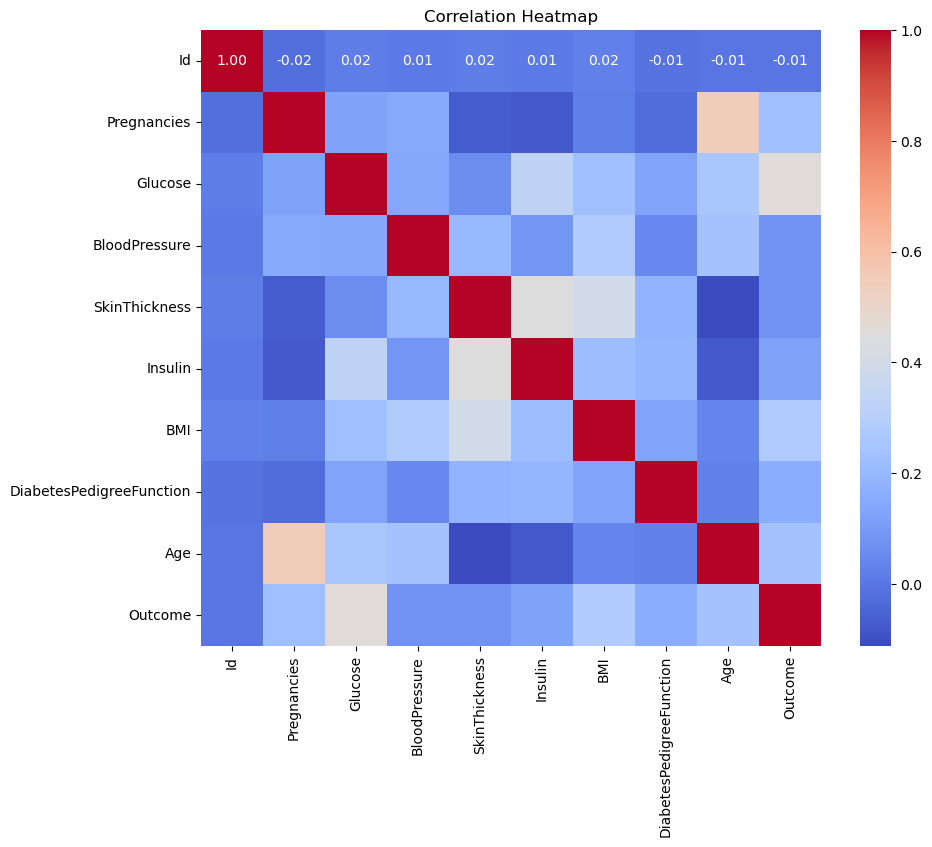

In [33]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


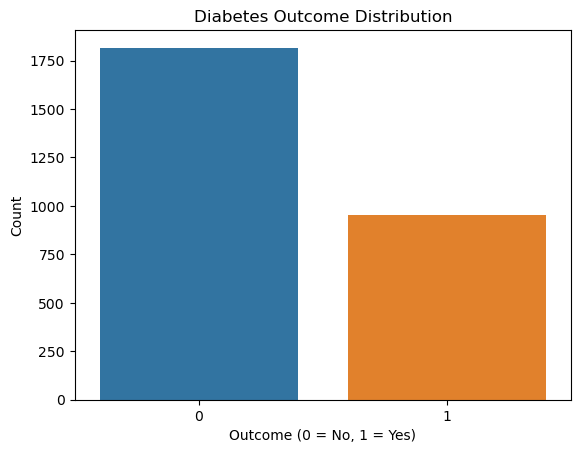

In [35]:
#Outcome Distribution

sns.countplot(x='Outcome', data=df)
plt.title('Diabetes Outcome Distribution')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


In [37]:
import numpy as np

# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]


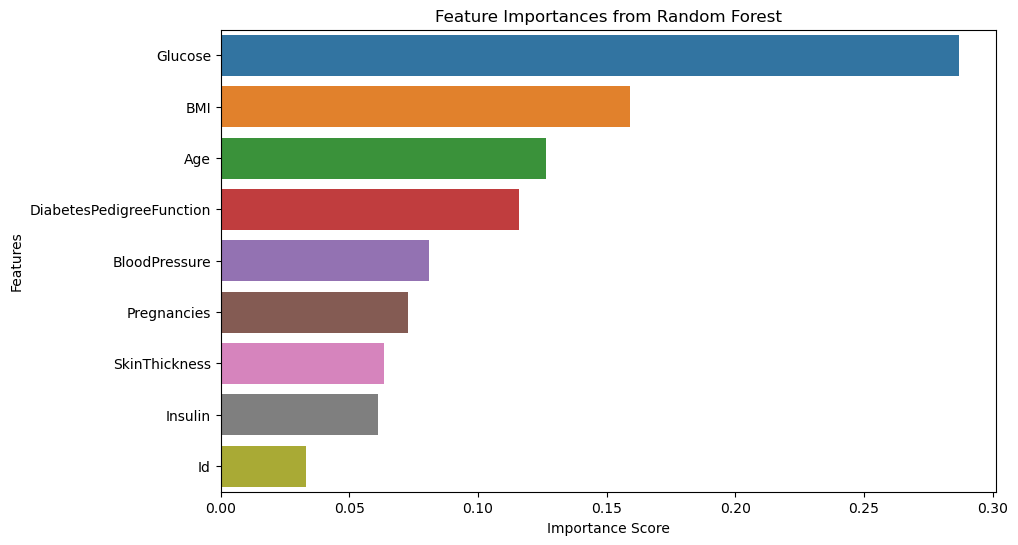

In [39]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\mrvis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mrvis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mrvis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mrvis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

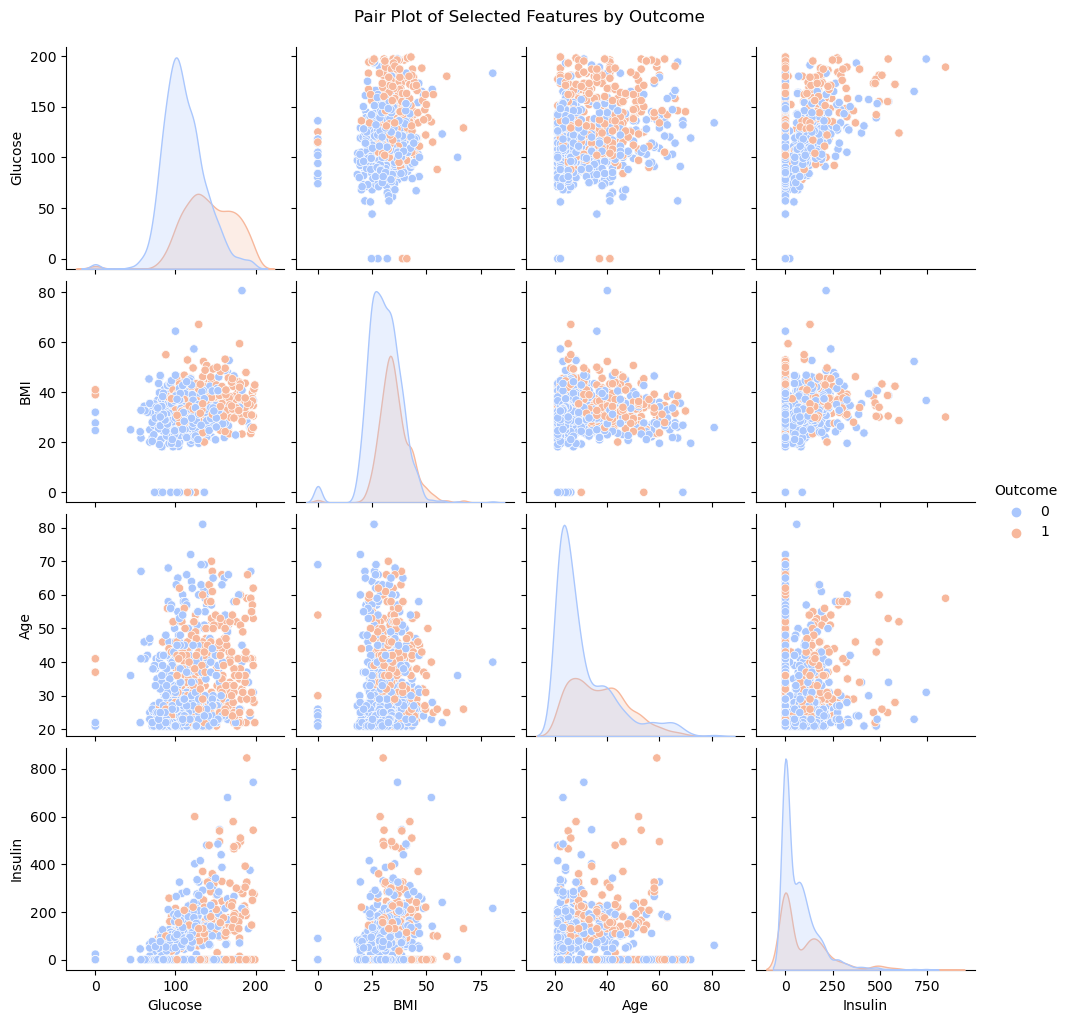

In [43]:
# Select a subset of features for clarity (optional)
selected_features = ['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']

# Create the pair plot
sns.pairplot(df[selected_features], hue='Outcome', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pair Plot of Selected Features by Outcome', y=1.02)
plt.show()


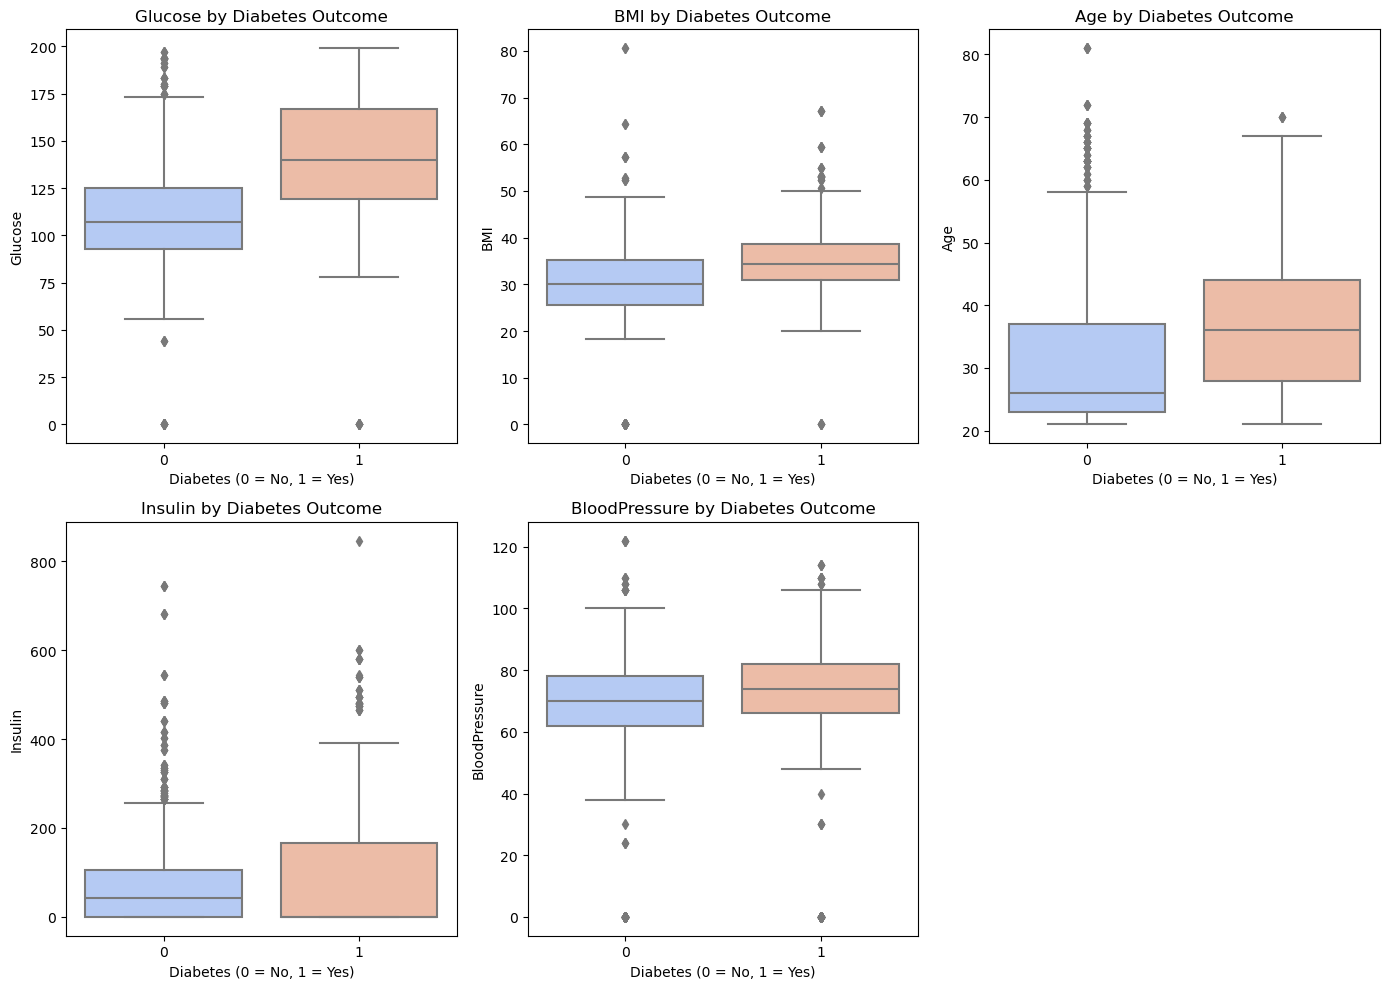

In [45]:
# Features to compare
box_features = ['Glucose', 'BMI', 'Age', 'Insulin', 'BloodPressure']

# Create boxplots for each feature grouped by Outcome
plt.figure(figsize=(14, 10))
for i, feature in enumerate(box_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Outcome', y=feature, data=df, palette='coolwarm')
    plt.title(f'{feature} by Diabetes Outcome')
    plt.xlabel('Diabetes (0 = No, 1 = Yes)')
    plt.ylabel(feature)
    
plt.tight_layout()
plt.show()


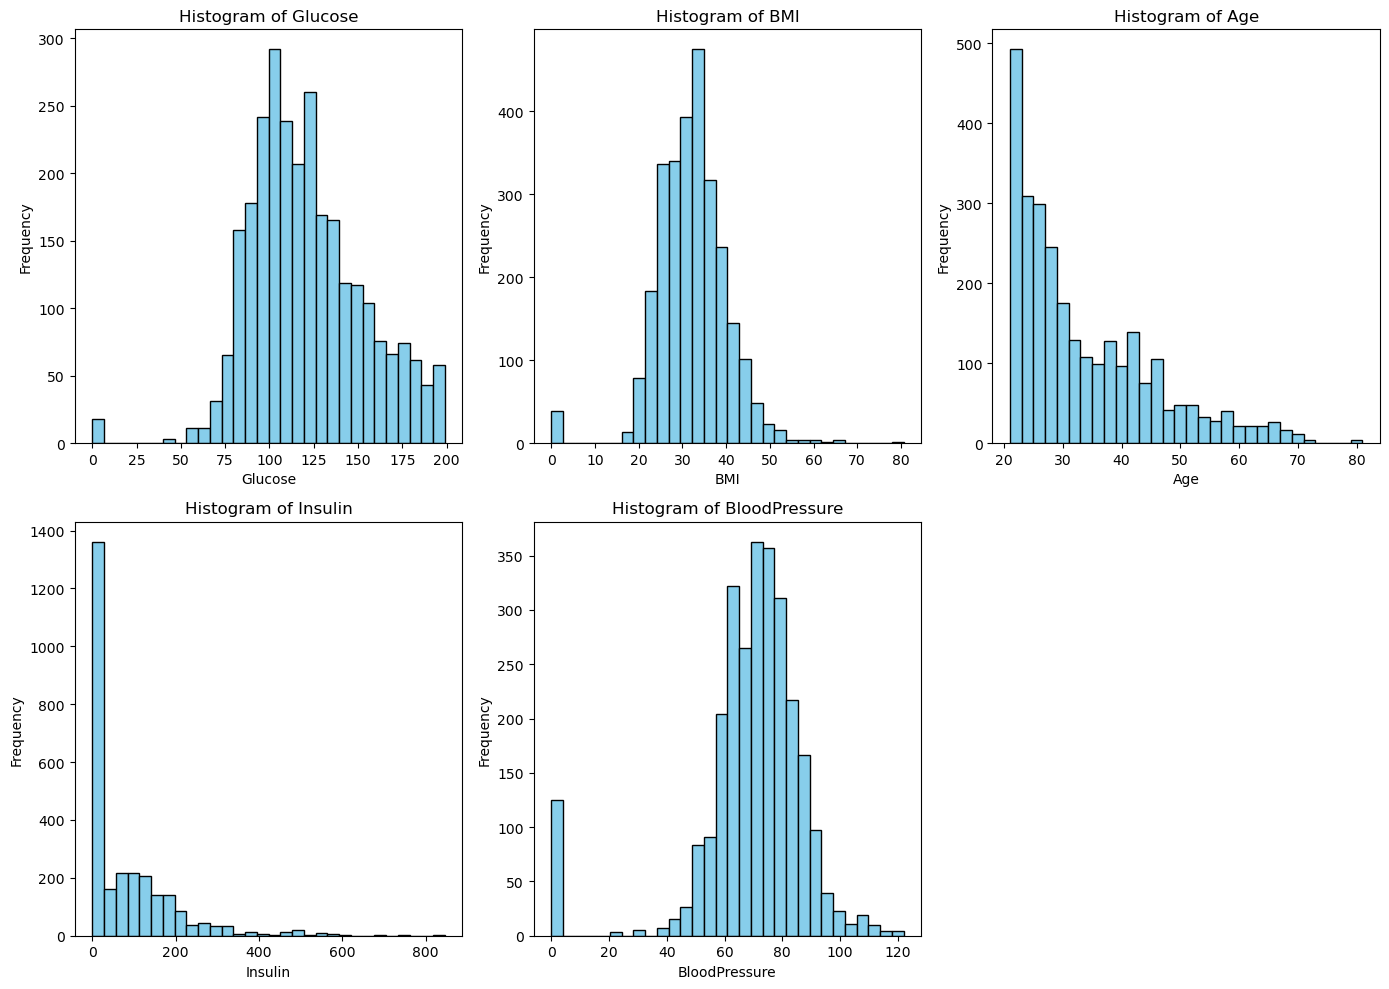

In [47]:
# Select features to plot
hist_features = ['Glucose', 'BMI', 'Age', 'Insulin', 'BloodPressure']

# Plot histograms
plt.figure(figsize=(14, 10))
for i, feature in enumerate(hist_features, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


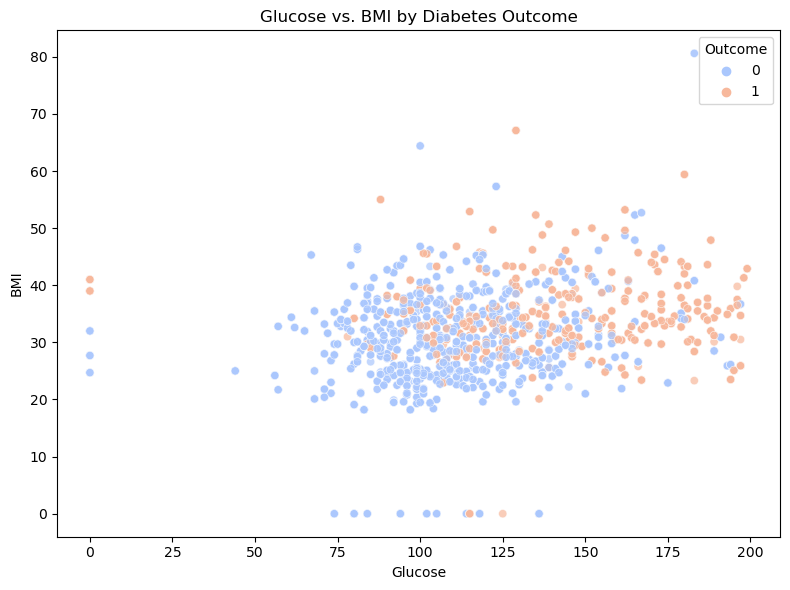

In [49]:
#Scatter plot

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome', palette='coolwarm', alpha=0.7)
plt.title('Glucose vs. BMI by Diabetes Outcome')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()


In [51]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Example: generate confusion matrix using predictions
conf_matrix = confusion_matrix(y_test, rf_pred)  # replace rf_pred with your prediction variable if different


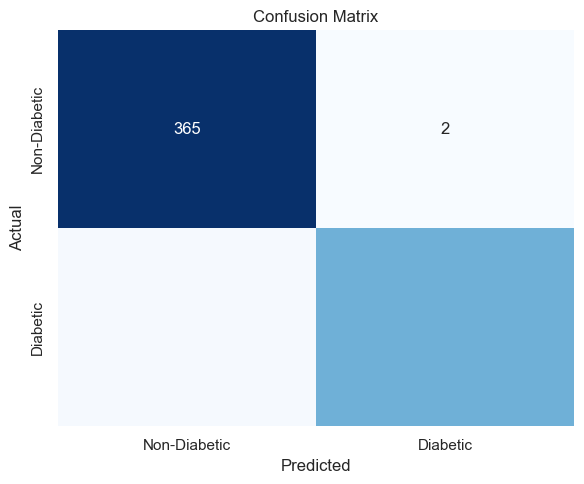

In [53]:
# Plot the confusion matrix
sns.set(style="whitegrid")
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


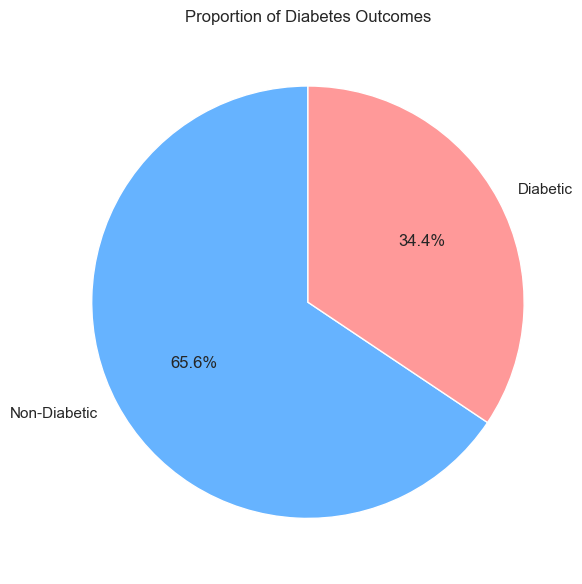

In [55]:

# Count the occurrences of each outcome
outcome_counts = df['Outcome'].value_counts()
labels = ['Non-Diabetic', 'Diabetic']
colors = ['#66b3ff', '#ff9999']

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proportion of Diabetes Outcomes')
plt.axis('equal')  # Ensures pie is a circle
plt.tight_layout()
plt.show()


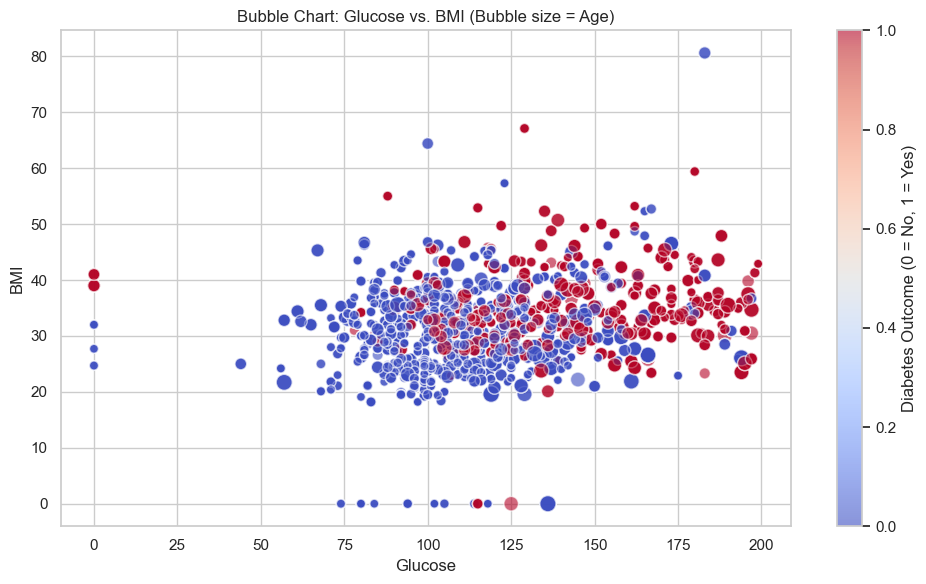

In [57]:

# Set up the figure
plt.figure(figsize=(10, 6))

# Create the bubble chart
plt.scatter(df['Glucose'], df['BMI'],
            s=df['Age']*2,  # Bubble size scaled by Age
            c=df['Outcome'],  # Color by diabetes status
            cmap='coolwarm', alpha=0.6, edgecolors='w')

plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Bubble Chart: Glucose vs. BMI (Bubble size = Age)')
plt.colorbar(label='Diabetes Outcome (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()


In [59]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


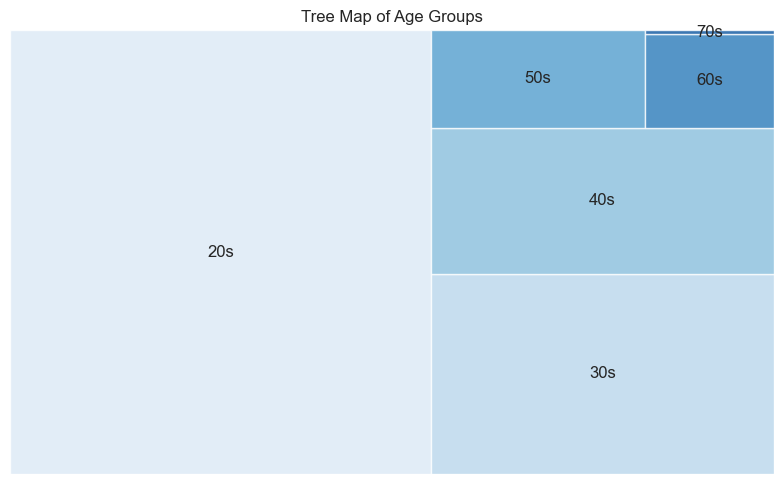

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Optional: group ages into bins
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20s', '30s', '40s', '50s', '60s', '70s'])

# Count each age group
age_counts = df['AgeGroup'].value_counts().sort_index()

# Plot the treemap
plt.figure(figsize=(8, 5))
squarify.plot(sizes=age_counts.values, label=age_counts.index, color=sns.color_palette('Blues', len(age_counts)), alpha=0.8)
plt.title('Tree Map of Age Groups')
plt.axis('off')
plt.tight_layout()
plt.show()
